In [18]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [19]:
pip install folium

     |████████████████████████████████| 95 kB 5.8 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import folium

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_51ad1395d1c64c35aa7577fea0c4266c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8pHm9Jz1HvNzdiHUEg1JsVDAif58zLGf7sofVHF1wQvY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_51ad1395d1c64c35aa7577fea0c4266c.get_object(Bucket='ibmregression-donotdelete-pr-7ewr5zgwjfd3te',Key='Real estate.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [12]:
df.shape

(414, 8)

In [92]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [93]:
df['X1 transaction date']=df['X1 transaction date'].astype(str)

In [94]:
df.dtypes

No                                          int64
X1 transaction date                        object
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [95]:
df[['Year','MD']]=df['X1 transaction date'].str.split('.',expand=True)

In [96]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year,MD
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,917
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,917
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,583
3,4,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8,2013,5
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,833


Text(0.5, 0.98, 'X3 distance to the nearest MRT station')

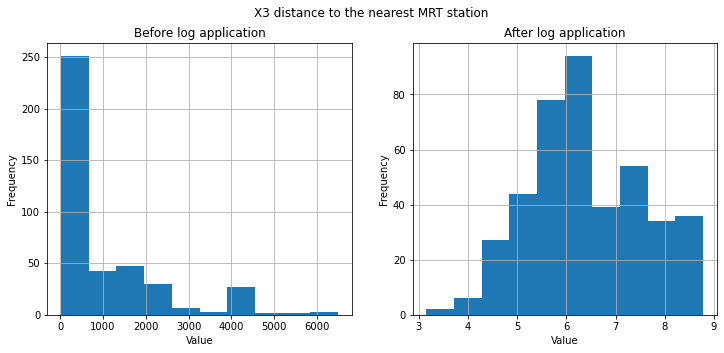

In [97]:
#plt.plot(df['X3 distance to the nearest MRT station'],norm.pdf(df['X3 distance to the nearest MRT station'],df['X3 distance to the nearest MRT station'].mean(),df['X3 distance to the nearest MRT station'].std()))
fig,(ax_before,ax_after)=plt.subplots(1,2,figsize=(12,5))
df['X3 distance to the nearest MRT station'].hist(ax=ax_before)
df['X3 distance to the nearest MRT station'].apply(np.log).hist(ax=ax_after)
ax_before.set(title='Before log application',ylabel='Frequency',xlabel='Value')
ax_after.set(title='After log application',ylabel='Frequency',xlabel='Value')
fig.suptitle('X3 distance to the nearest MRT station')


Text(0.5, 0.98, 'Y house price of unit area')

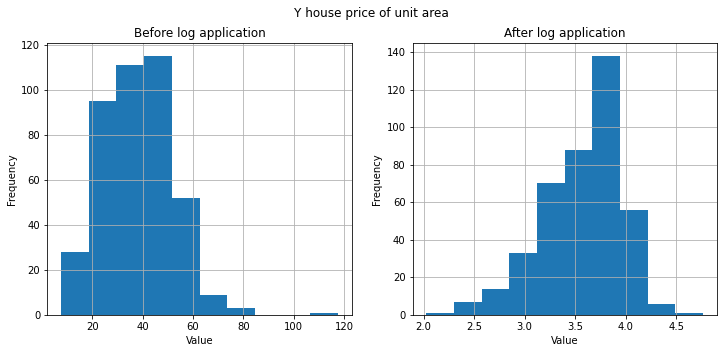

In [98]:
fig,(ax_before,ax_after)=plt.subplots(1,2,figsize=(12,5))
df['Y house price of unit area'].hist(ax=ax_before)
df['Y house price of unit area'].apply(np.log).hist(ax=ax_after)
ax_before.set(title='Before log application',ylabel='Frequency',xlabel='Value')
ax_after.set(title='After log application',ylabel='Frequency',xlabel='Value')
fig.suptitle('Y house price of unit area')

In [13]:
House_locations=df[['X5 latitude','X6 longitude','X2 house age']]

In [14]:
House_locations=House_locations.rename(columns={'X5 latitude':'Latitude','X6 longitude':'Longitude'})

In [21]:
map=folium.Map(location=[House_locations.Latitude.mean(),House_locations.Longitude.mean()],zoom_start=15,control_scale=True)

In [22]:
for index,location_info in House_locations.iterrows():
    folium.Marker([location_info["Latitude"],location_info["Longitude"]],popup=location_info["X2 house age"]).add_to(map)

In [23]:
map

In [126]:
df1=df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','Y house price of unit area','X5 latitude','X6 longitude']]

In [127]:
df1.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,X5 latitude,X6 longitude
X2 house age,1.000000,0.025622,0.049593,-0.210567,0.054420,-0.048520
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.673613,-0.591067,-0.806317
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.571005,0.444143,0.449099
Y house price of unit area,-0.210567,-0.673613,0.571005,1.000000,0.546307,0.523287
X5 latitude,0.054420,-0.591067,0.444143,0.546307,1.000000,0.412924
X6 longitude,-0.048520,-0.806317,0.449099,0.523287,0.412924,1.000000


In [105]:
X_train=df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X1 transaction date','X5 latitude','X6 longitude']]
Y_train=df[['Y house price of unit area']]
X_test=df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X1 transaction date','X5 latitude','X6 longitude']]
Y_test=df[['Y house price of unit area']]

In [106]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue,ypredicted):
    return np.sqrt(mean_squared_error(ytrue,ypredicted))

In [107]:
from sklearn.linear_model import LinearRegression
linearRegression=LinearRegression().fit(X_train,Y_train)
linearRegression_rmse=rmse(Y_test,linearRegression.predict(X_test))
print(linearRegression_rmse)

8.782466464602793


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

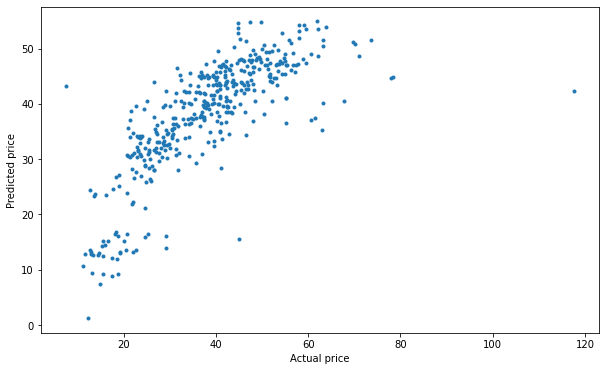

In [109]:
f=plt.figure(figsize=(10,6))

ax=plt.axes()

ax.plot(Y_test,linearRegression.predict(X_test),
       marker='o',ls='',ms=3.0)

lim=(0,Y_test.max())

ax.set(xlabel='Actual price',
       ylabel='Predicted price',
       ylim=lim,
       title='Linear Regression results')

In [110]:
from sklearn.linear_model import RidgeCV
alphas=[0.005,0.1,0.3,1,3,5,10,15,30,80]
ridgeCV=RidgeCV(alphas=alphas,
               cv=4).fit(X_train,Y_train)
ridgeCV_rmse=rmse(Y_test,ridgeCV.predict(X_test))
print(ridgeCV.alpha_,ridgeCV_rmse)

0.005 8.785913615704882


In [111]:
from sklearn.linear_model import LassoCV
alphas2=np.array([0.005,0.05,0.1,1,5,20])

lassoCV=LassoCV(alphas=alphas2,
               max_iter=5e4,
               cv=4).fit(X_train,Y_train)
lassoCV_rmse=rmse(Y_test,lassoCV.predict(X_test))
print(lassoCV.alpha_,lassoCV_rmse)

0.005 8.797768615138525


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
print('of{}coefficients,{} are non-zero with lasso'.format(len(lassoCV.coef_),
                                                          len(lassoCV.coef_.nonzero()[0])))

of6coefficients,5 are non-zero with lasso


In [113]:
from sklearn.linear_model import ElasticNetCV

l1_ratios=np.linspace(0.1,0.9,9)

elasticNetCV=ElasticNetCV(alphas=alphas2,
                         l1_ratio=l1_ratios,
                         max_iter=1e4).fit(X_train,Y_train)
elasticNetCV_rmse=rmse(Y_test,elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_,elasticNetCV.l1_ratio_,elasticNetCV_rmse)

0.005 0.9 8.995904218910947


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
rmse_vals=[linearRegression_rmse,ridgeCV_rmse,lassoCV_rmse,elasticNetCV_rmse]
labels=['Linear','Ridge','Lasso','ElasticNet']

rmse_df=pd.Series(rmse_vals,index=labels).to_frame()
rmse_df.rename(columns={0:'RMSE'},inplace=1)
rmse_df

,RMSE
Linear,8.782466
Ridge,8.785914
Lasso,8.797769
ElasticNet,8.995904
